In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import mpl_scatter_density
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap

In [2]:
frankfurt_set = pd.read_csv("frankfurt.csv")
frankfurt_weather = pd.read_csv("frankfurt_weather.csv")

In [6]:
frankfurt_set.describe()

,b_number,orig_lat,orig_lng,dest_lat,dest_lng
count,20062.000000,20062.000000,20062.000000,20062.000000,20062.000000
mean,38425.378676,50.116503,8.663449,50.116166,8.663158
std,1508.156006,0.046574,0.348031,0.046621,0.348072
min,11420.000000,48.353926,-3.240663,48.353926,-3.240663
25%,38165.000000,50.107599,8.663165,50.107599,8.660891
50%,38400.000000,50.114852,8.674521,50.114370,8.674521
75%,38698.000000,50.123192,8.690094,50.122879,8.689225
max,91229.000000,51.525284,11.789030,51.525284,11.789030


In [7]:
frankfurt_weather.head()

,Produkt_Code,SDO_ID,Zeitstempel,Wert,Qualitaet_Byte,Qualitaet_Niveau
0,TT_TU_MN009,1420,201902010000,-0.3,7,6
1,TT_TU_MN009,1420,201902010100,-0.1,7,6
2,TT_TU_MN009,1420,201902010200,-0.3,7,1
3,TT_TU_MN009,1420,201902010300,-0.3,7,1
4,TT_TU_MN009,1420,201902010400,0.0,7,1


In [160]:
frankfurt_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20062 entries, 0 to 20061
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            20062 non-null  object 
 1   time           20062 non-null  object 
 2   b_number       20062 non-null  int64  
 3   city           20062 non-null  object 
 4   trip_duration  20062 non-null  object 
 5   orig_lat       20062 non-null  float64
 6   orig_lng       20062 non-null  float64
 7   dest_lat       20062 non-null  float64
 8   dest_lng       20062 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.4+ MB


--> .values creates an array out of the lats and lngs

In [161]:
from math import radians, cos, sin, asin, sqrt
def haversine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

  # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

In [162]:
for ind, row in frankfurt_set.iterrows():
    frankfurt_set.loc[ind, "distance"] = haversine(row['orig_lng'], row['orig_lat'], row['dest_lng'], row['dest_lat'])

In [163]:
frankfurt_set.head()

,day,time,b_number,city,trip_duration,orig_lat,orig_lng,dest_lat,dest_lng,distance
0,2019-06-25,21:51:00,11420,frankfurt,0 days 00:07:00.000000000,49.991072,8.412515,49.984942,8.409474,0.715443
1,2019-06-26,06:33:00,11420,frankfurt,0 days 00:14:00.000000000,49.984942,8.409474,49.985673,8.424641,1.087474
2,2019-06-27,13:20:00,11420,frankfurt,0 days 00:07:00.000000000,49.985613,8.424448,49.985538,8.424533,0.010389
3,2019-06-27,13:30:00,11420,frankfurt,0 days 00:04:00.000000000,49.985528,8.424512,49.985679,8.424603,0.018012
4,2019-06-27,13:59:00,11420,frankfurt,0 days 00:09:00.000000000,49.985679,8.424603,49.985636,8.424570,0.005321


In [164]:
frankfurt_set.shape

(20062, 10)

In [167]:
frankfurt_set.trip_duration.duplicated().sum()

19885

In [171]:
frankfurt_set.day = pd.to_datetime(frankfurt_set.day)

In [179]:
frankfurt_set.head()

,day,time,b_number,city,trip_duration,orig_lat,orig_lng,dest_lat,dest_lng,distance,Weekday
0,2019-06-25,21:51:00,11420,frankfurt,0 days 00:07:00.000000000,49.991072,8.412515,49.984942,8.409474,0.715443,Tuesday
1,2019-06-26,06:33:00,11420,frankfurt,0 days 00:14:00.000000000,49.984942,8.409474,49.985673,8.424641,1.087474,Wednesday
2,2019-06-27,13:20:00,11420,frankfurt,0 days 00:07:00.000000000,49.985613,8.424448,49.985538,8.424533,0.010389,Thursday
3,2019-06-27,13:30:00,11420,frankfurt,0 days 00:04:00.000000000,49.985528,8.424512,49.985679,8.424603,0.018012,Thursday
4,2019-06-27,13:59:00,11420,frankfurt,0 days 00:09:00.000000000,49.985679,8.424603,49.985636,8.424570,0.005321,Thursday


In [177]:
from datetime import date
import calendar
my_date = date.today()
calendar.day_name[my_date.weekday()] 

'Monday'

In [178]:
for ind, row in frankfurt_set.iterrows():
    frankfurt_set.loc[ind, "Weekday"] = calendar.day_name[row['day'].weekday()]

In [185]:
frankfurt_groups_time = frankfurt_set.groupby("time").mean()

In [188]:
frankfurt_groups_time

,b_number,orig_lat,orig_lng,dest_lat,dest_lng,distance
time,,,,,,
00:00:00,38767.000000,50.114248,8.690970,50.105760,8.689660,1.135077
00:01:00,38509.000000,50.114923,8.680060,50.127727,8.685935,1.598570
00:02:00,38273.200000,50.115199,8.675618,50.120248,8.682841,2.379820
00:03:00,38086.000000,50.117585,8.684990,50.109525,8.694107,1.895184
00:04:00,38182.750000,50.107216,8.691576,50.120115,8.661019,3.009644
...,...,...,...,...,...,...
23:54:00,38391.285714,50.110774,8.670841,50.115584,8.673791,2.082524
23:55:00,38443.500000,50.100898,8.648346,50.105626,8.665629,1.343214
23:56:00,38407.428571,50.112923,8.661192,50.110146,8.669139,1.639425


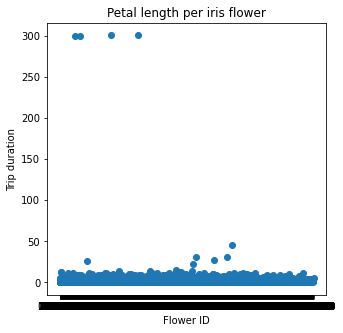

In [204]:
plt.figure(figsize = (5,5))
plt.scatter(frankfurt_set["time"], frankfurt_set["distance"])
plt.xlabel("Flower ID")
plt.ylabel("Trip duration")
plt.title("Petal length per iris flower")
plt.axis("tight")
plt.show()

In [ ]:
f, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 10))
#barplots
sns.barplot(x="time",y="distance",data=frankfurt_set, ax=axes[0],palette="magma")


plt.show()